# Bank marketing analysis

In [15]:
# chargement des libraries

import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv('./bank_data.csv')
data.head()

Unnamed: 0  age          job  marital  education default  balance housing  \
0           0   30   unemployed  married    primary      no     1787      no   
1           1   33     services  married  secondary      no     4789     yes   
2           2   35   management   single   tertiary      no     1350     yes   
3           3   30   management  married   tertiary      no     1476     yes   
4           4   59  blue-collar  married  secondary      no        0     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  cellular   19   oct        79         1     -1         0  unknown  no  
1  yes  cellular   11   may       220         1    339         4  failure  no  
2   no  cellular   16   apr       185         1    330         1  failure  no  
3  yes   unknown    3   jun       199         4     -1         0  unknown  no  
4   no   unknown    5   may       226         1     -1         0  unknown  no

In [17]:
data.isna().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [18]:
data.describe()

Unnamed: 0          age       balance          day     duration  \
count  4521.000000  4521.000000   4521.000000  4521.000000  4521.000000   
mean   2260.000000    41.170095   1422.657819    15.915284   263.961292   
std    1305.244613    10.576211   3009.638142     8.247667   259.856633   
min       0.000000    19.000000  -3313.000000     1.000000     4.000000   
25%    1130.000000    33.000000     69.000000     9.000000   104.000000   
50%    2260.000000    39.000000    444.000000    16.000000   185.000000   
75%    3390.000000    49.000000   1480.000000    21.000000   329.000000   
max    4520.000000    87.000000  71188.000000    31.000000  3025.000000   

          campaign        pdays     previous  
count  4521.000000  4521.000000  4521.000000  
mean      2.793630    39.766645     0.542579  
std       3.109807   100.121124     1.693562  
min       1.000000    -1.000000     0.000000  
25%       1.000000    -1.000000     0.000000  
50%       2.000000    -1.000000     0.000000  
75%       3.000000    -1.000000     0.000000  
max      50.000000   871.000000    25.000000

In [19]:
data = data.drop(columns=['Unnamed: 0'])

In [20]:
data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [21]:
jobless_categories = ['student', 'unemployed', 'retired']
data['job'] = data['job'].replace(jobless_categories, 'jobless')
data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
jobless          442
services         417
self-employed    183
entrepreneur     168
housemaid        112
unknown           38
Name: job, dtype: int64

In [22]:
data['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns for label encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the modified DataFrame
data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30    4        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    5        2          2        0     1350        1     0        0   
3   30    5        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0

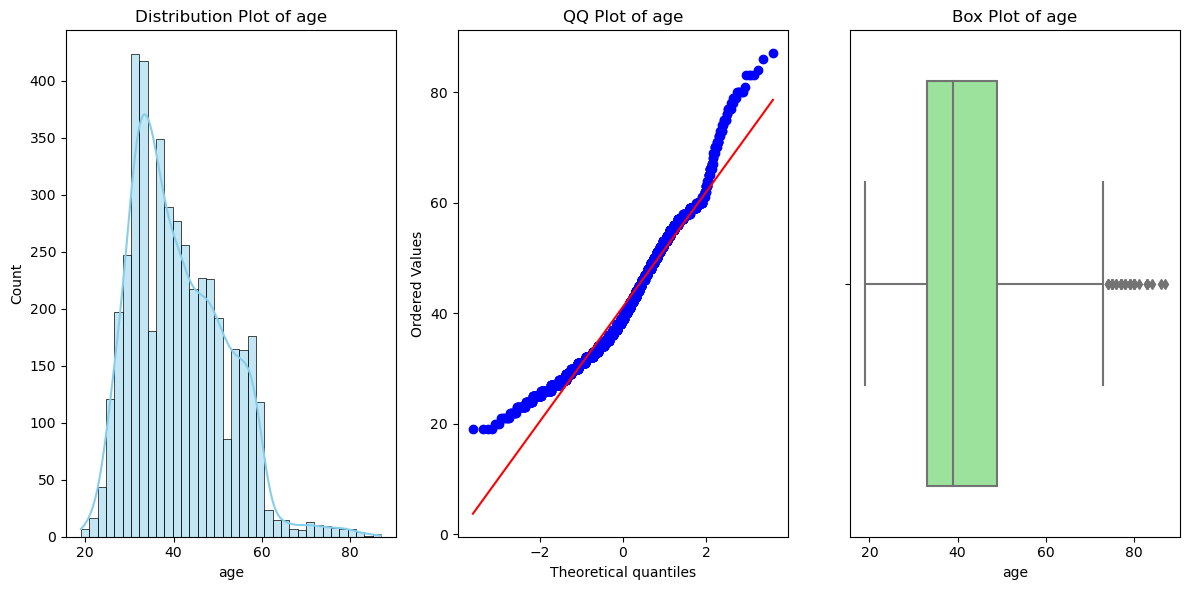

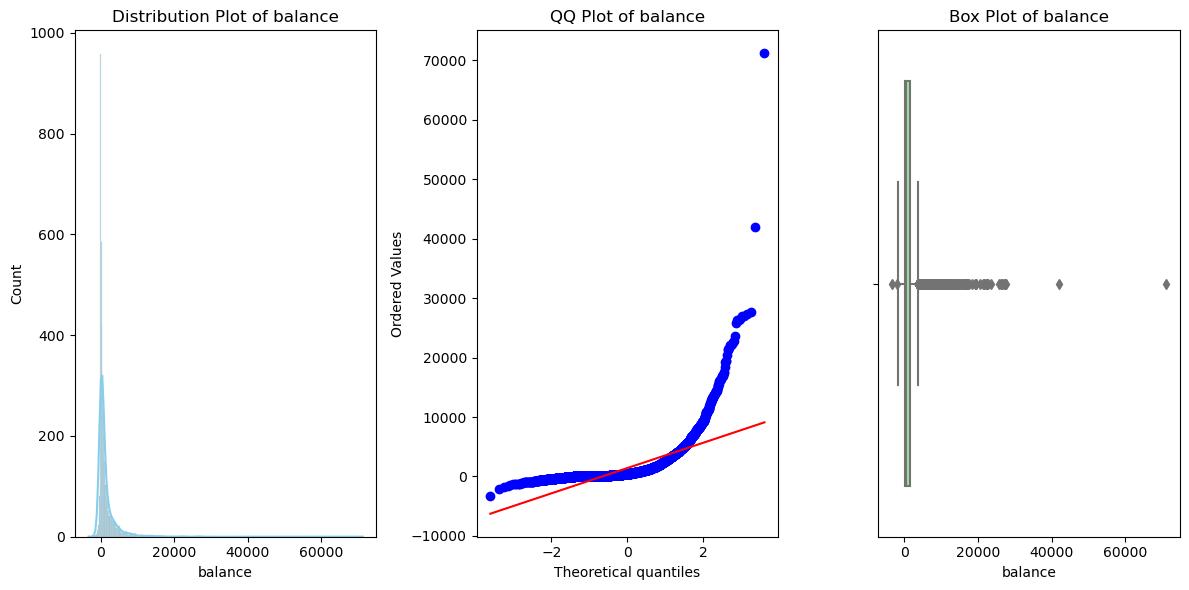

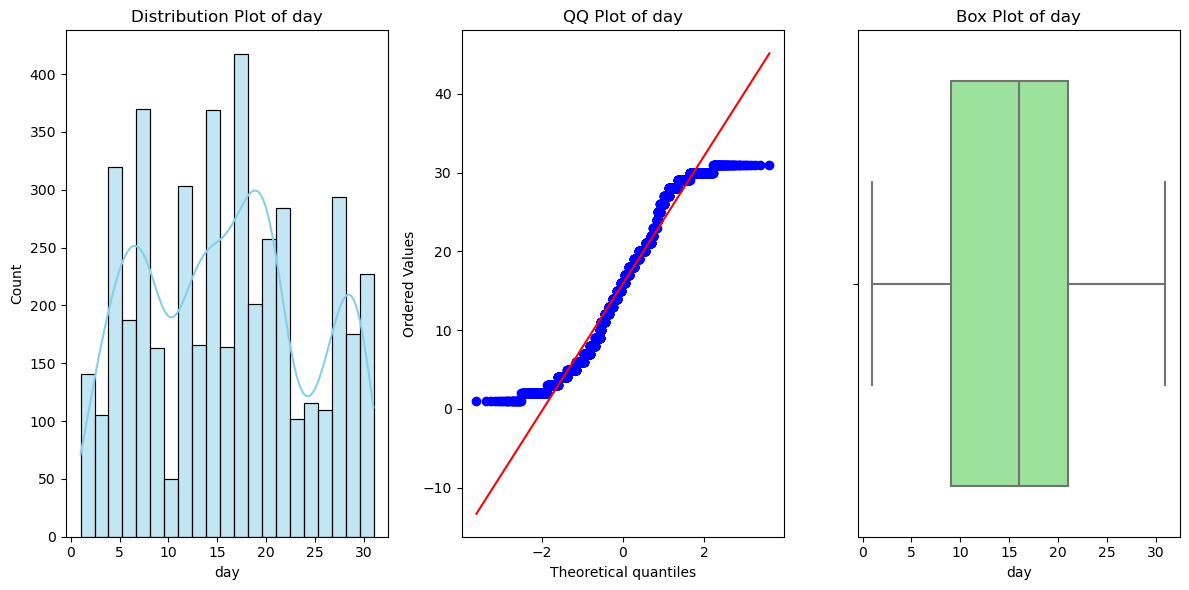

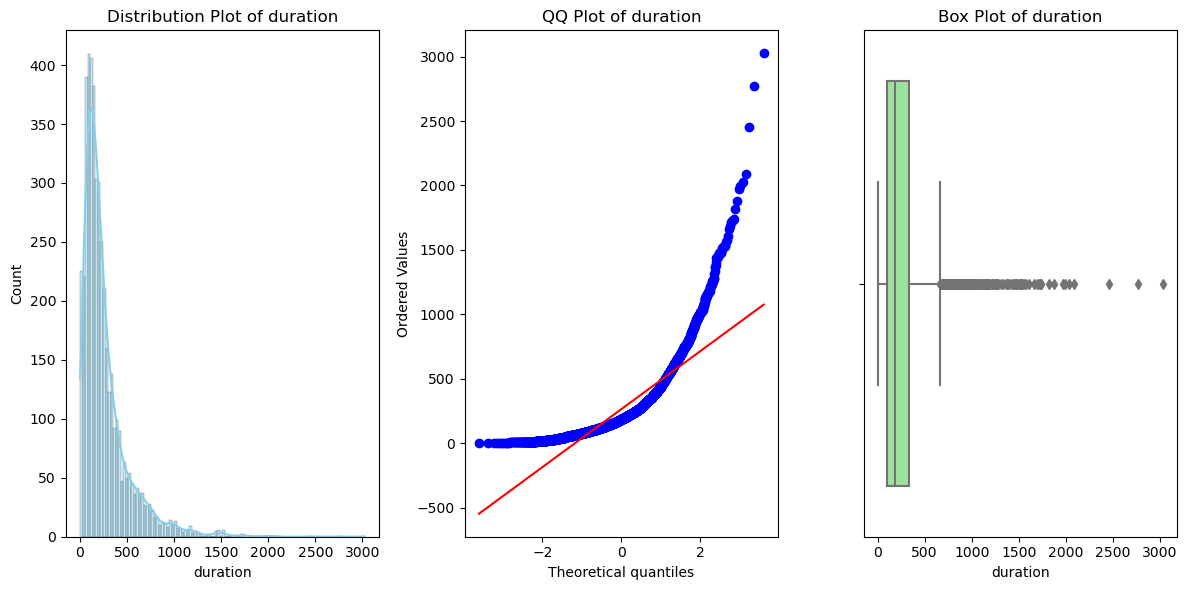

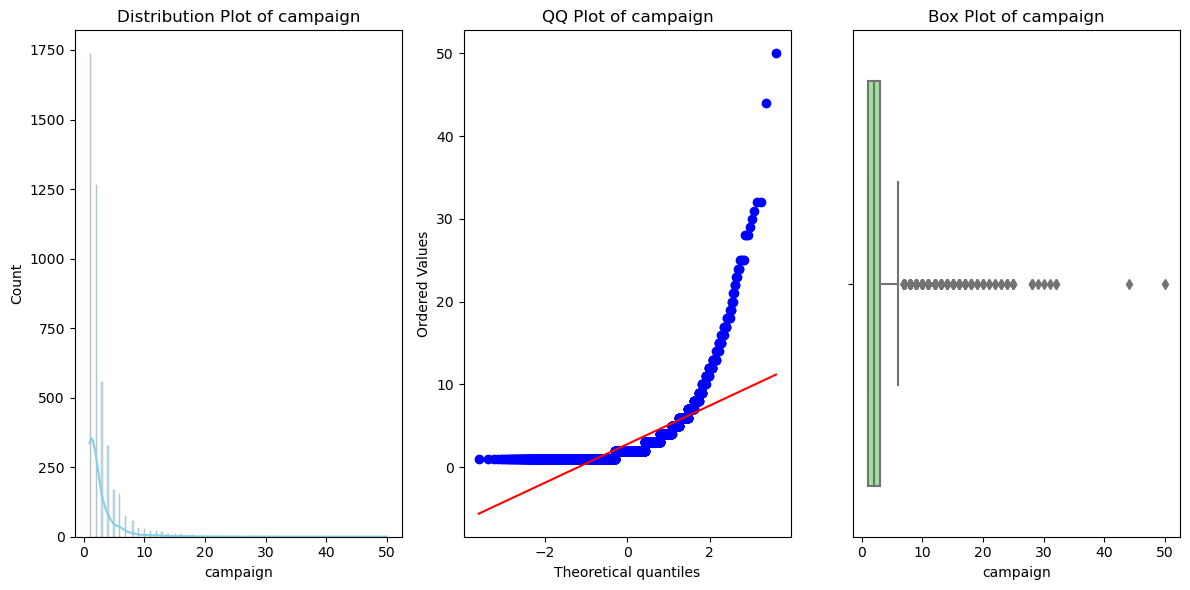

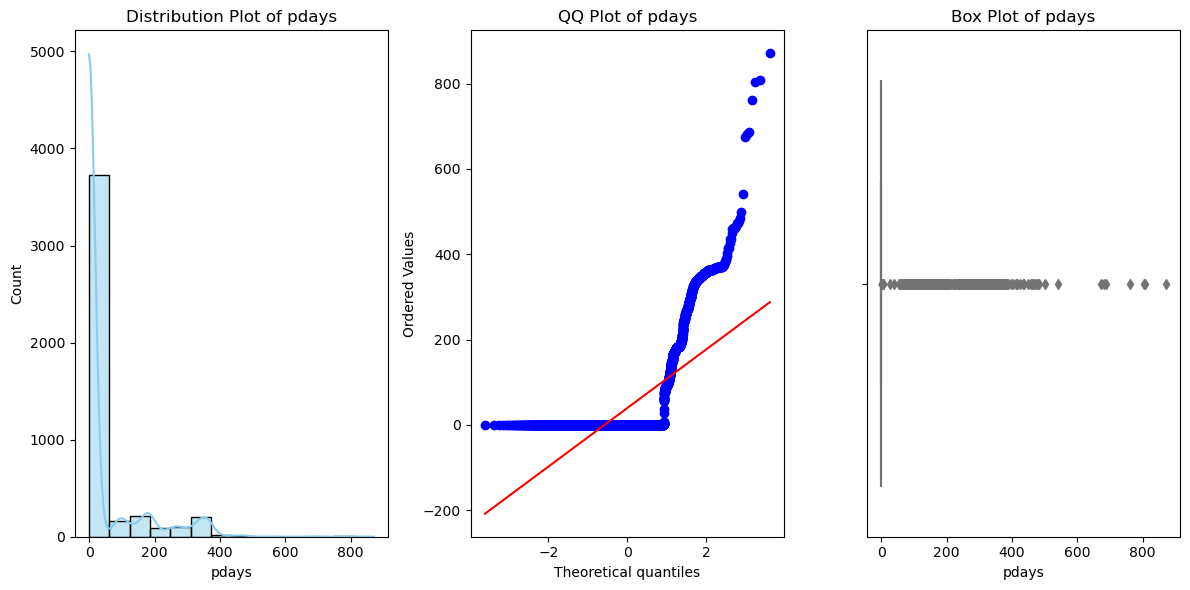

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Select the columns of interest
columns_of_interest = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

# Plot distribution plots, QQ plots, and box plots for each feature
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    
    # Distribution plot
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution Plot of {column}')
    
    # QQ plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.preprocessing import PowerTransformer

# Select features for transformation
features_to_transform = ['age', 'balance', 'duration', 'campaign']

# Initialize PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit and transform the selected features
data[features_to_transform] = power_transformer.fit_transform(data[features_to_transform])

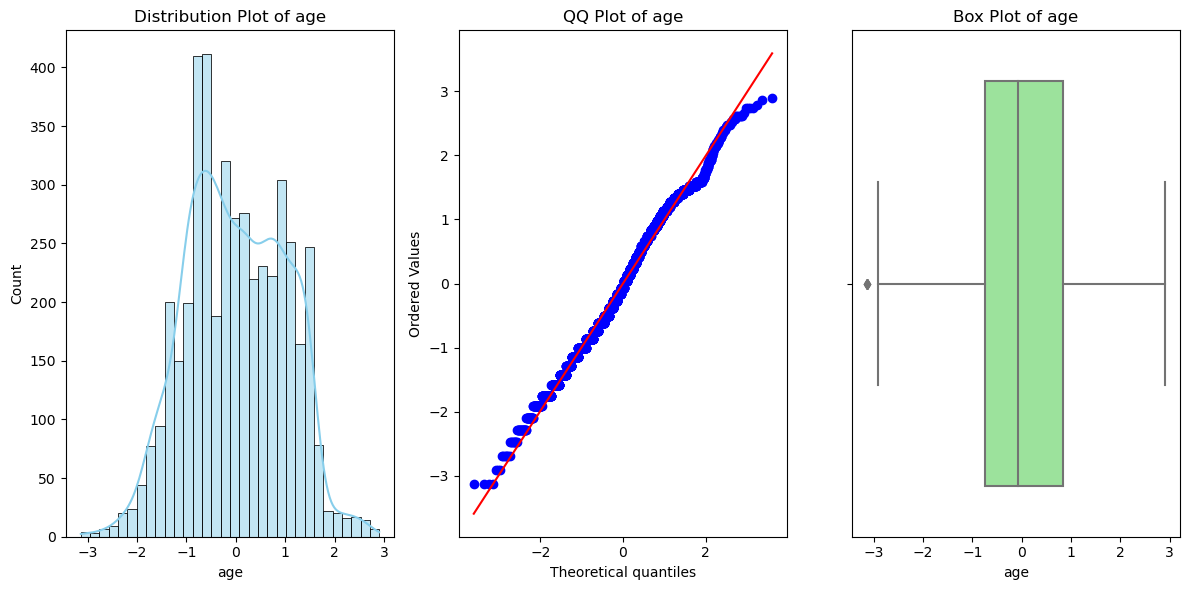

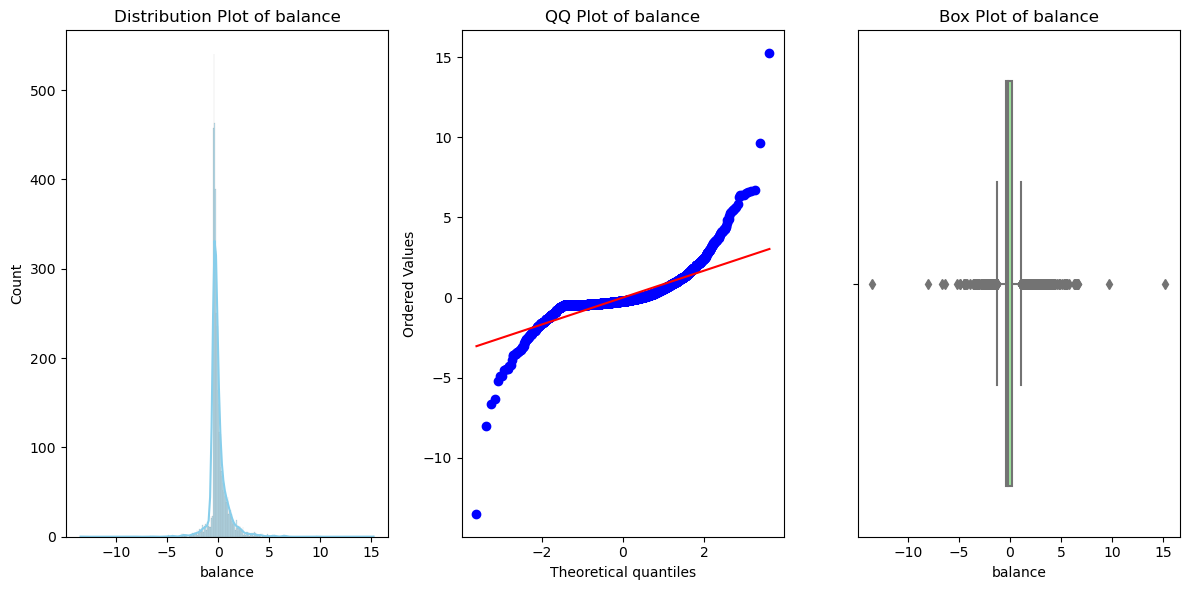

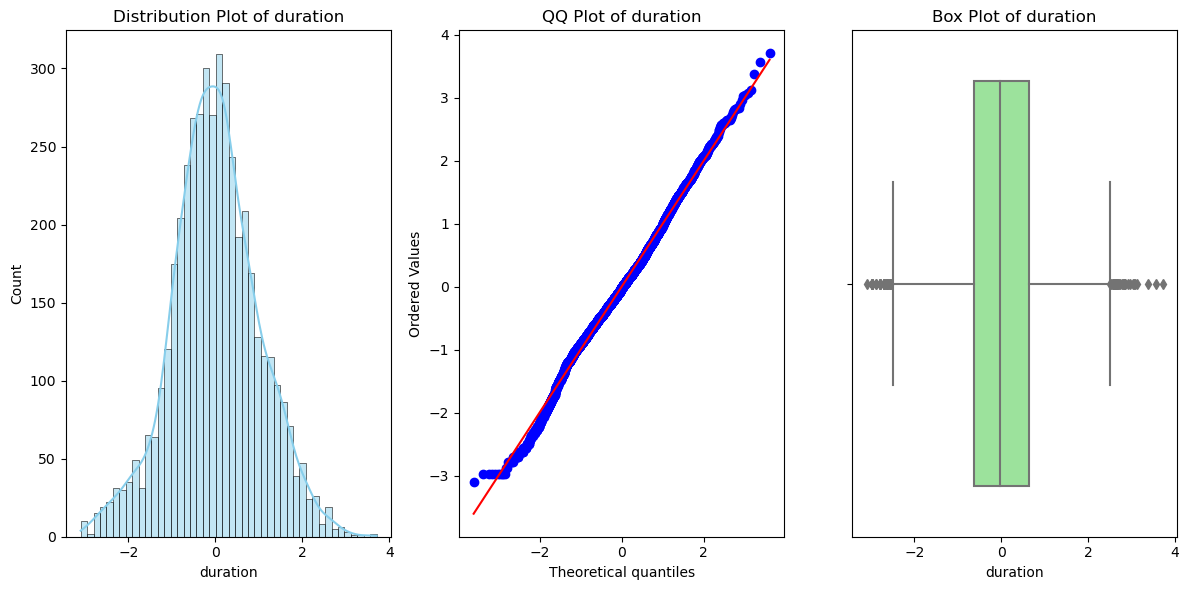

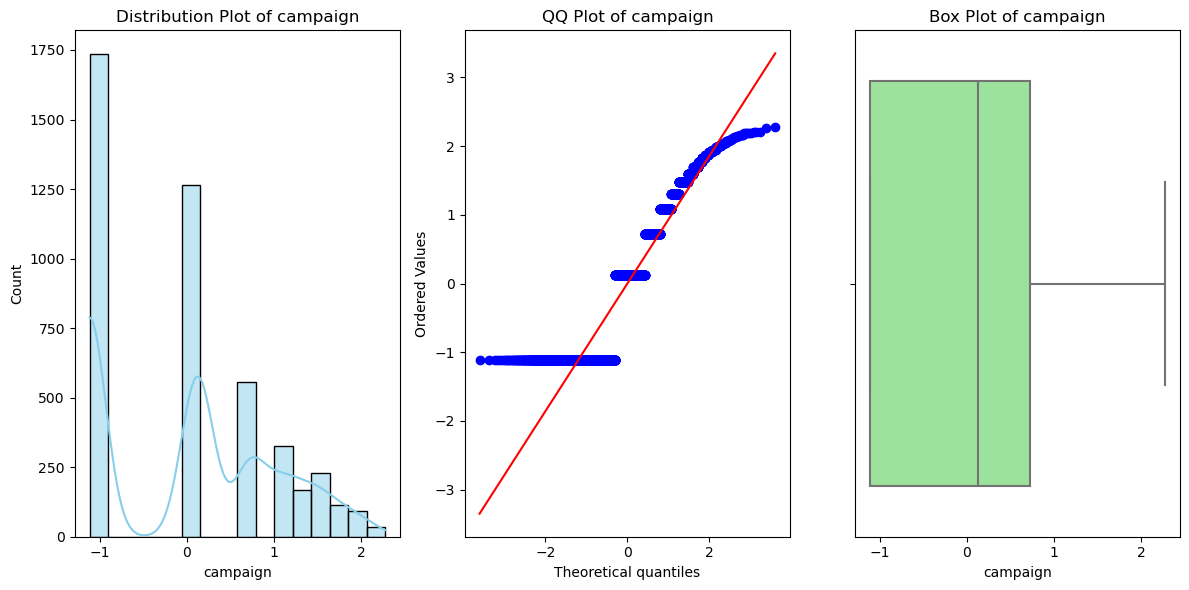

In [27]:
# Select the columns of interest
columns_of_interest = ['age', 'balance', 'duration', 'campaign']

# Plot distribution plots, QQ plots, and box plots for each feature
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    
    # Distribution plot
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution Plot of {column}')
    
    # QQ plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [28]:
#%pip install XGBClassifier


(base) c:\Users\dev-dan\Documents\Master\M2\data_viz\Normal>doskey make=mingw32-make.exe 
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement XGBClassifier (from versions: none)
ERROR: No matching distribution found for XGBClassifier


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Create feature matrix X and target vector y
X = data.drop(columns=['y'])
y = data['y']

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# GridSearchCV for XGBoost Classifier
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

# Get best parameters for XGBoost Classifier
best_params = xgb_grid_search.best_params_

print(best_params)

# Predict on the test set
y_pred = xgb_grid_search.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
y_proba = xgb_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'xgboost'